In [13]:
# Image processing imports
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import remove_small_holes, remove_small_objects
from skimage.measure import label, regionprops, regionprops_table
from scipy.ndimage import binary_fill_holes
import imageio.v3 as iio
import pandas as pd
import numpy as np
import os 
import sys 
import matplotlib.pyplot as plt
import math

In [3]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# to make sure the computer doesnt think you are deploying a bomb 
import PIL.Image
PIL.Image.MAX_IMAGE_PIXELS = 3019898880 

In [ ]:
# Load the image
file_name = '../data/Sample_data/20250129_AlSi_multi.png'
img = iio.imread(file_name)


In [ ]:

# Convert to grayscale if it's a color image
if img.ndim == 3:
    image_grayscale = rgb2gray(img)
else:
    image_grayscale = img

# Apply Otsu's thresholding to create a binary image
thresh = threshold_otsu(image_grayscale)
binary = image_grayscale > thresh

# Clean up the binary image by removing small objects and holes
removed_small_objects = remove_small_objects(binary, min_size=50)
tidy_image = remove_small_holes(removed_small_objects, area_threshold=50)


In [ ]:

# Label the connected components
label_image = label(tidy_image)
regions = regionprops(label_image)

# Sort the regions by area in descending order
regions_sorted_by_area = sorted(regions, key=lambda r: r.area, reverse=True)

# Define how many of the largest regions you want to find
number_of_largest_features = 6

# Get the bounding boxes of the top N largest features
largest_features = regions_sorted_by_area[:number_of_largest_features]
print(largest_features)


[(76, (3395, 8517, 8517, 3395, 3395), (2225, 2225, 7279, 7279, 2225)), (319, (567, 3169, 3169, 567, 567), (3305, 3305, 5894, 5894, 3305)), (909, (4723, 6839, 6839, 4723, 4723), (7796, 7796, 9938, 9938, 7796)), (408, (9182, 10875, 10875, 9182, 9182), (4127, 4127, 5774, 5774, 4127)), (3, (6258, 7441, 7441, 6258, 6258), (120, 120, 1307, 1307, 120)), (14, (4870, 5589, 5589, 4870, 4870), (293, 293, 988, 988, 293))]


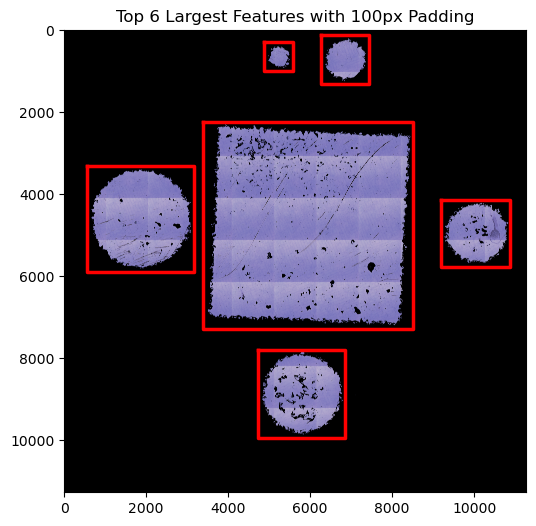

In [52]:
# Display the images
fig, axes = plt.subplots(1, figsize=(12, 6))

# Use the axes object for plotting
axes.imshow(img, cmap=plt.cm.gray) # Assuming 'img' is the original image you want to plot on

padding = 100# Define the padding in pixels

feature_crop = []

for feature in largest_features:

    label_no = feature.label
    minr, minc, maxr, maxc = feature.bbox
    
    # Calculate padded bounding box coordinates
    padded_minr = max(0, minr - padding)
    padded_minc = max(0, minc - padding)
    padded_maxr = min(img.shape[0], maxr + padding)
    padded_maxc = min(img.shape[1], maxc + padding)
    
    # Create the coordinates for the padded box
    bx = (padded_minc, padded_maxc, padded_maxc, padded_minc, padded_minc)
    by = (padded_minr, padded_minr, padded_maxr, padded_maxr, padded_minr)
    
    feature_crop.append((label_no,bx,by))
    # Plot the padded bounding box on the image
    axes.plot(bx, by, '-r', linewidth=2.5) # Using red color to distinguish from the previous example


print(feature_crop)


# Add title and show the plot
axes.set_title(f'Top {number_of_largest_features} Largest Features with {padding}px Padding')
plt.show()
    
